<a href="https://colab.research.google.com/github/murni27/Bank-loan-repayment-prediction/blob/main/loanprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA)

In [50]:
# Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
data=pd.read_csv(r"/content/drive/MyDrive/SKRIPSI/new_dataset.csv")

In [53]:
df = data.copy()

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 9.3+ MB


In [55]:
for col in df.select_dtypes(include='object').columns.tolist():
    print(df[col].value_counts(normalize=True)*100)
    print('\n')

Cash loans         91.88
Revolving loans     8.12
Name: NAME_CONTRACT_TYPE, dtype: float64


F    61.71
M    38.29
Name: CODE_GENDER, dtype: float64


N    67.58
Y    32.42
Name: FLAG_OWN_CAR, dtype: float64


Y    69.17
N    30.83
Name: FLAG_OWN_REALTY, dtype: float64


Unaccompanied      81.512689
Family             12.859866
Spouse, partner     3.551008
Children            1.073327
Other_B             0.662052
Other_A             0.260809
Group of people     0.080249
Name: NAME_TYPE_SUITE, dtype: float64


Working                 56.09
Commercial associate    22.52
Pensioner               15.53
State servant            5.82
Unemployed               0.04
Name: NAME_INCOME_TYPE, dtype: float64


Secondary / secondary special    75.00
Higher education                 20.28
Incomplete higher                 3.21
Lower secondary                   1.43
Academic degree                   0.08
Name: NAME_EDUCATION_TYPE, dtype: float64


Married                 61.81
Single / not married    1

In [56]:
decode_map = {0: "Non Default", 1: "Default"}
def decode_sentiment(label):
    return decode_map[int(label)]

df['TARGET'] = df['TARGET'].apply(lambda x: decode_sentiment(x))

In [57]:
target = (df[['TARGET']]
                .groupby("TARGET")
                .agg(COUNT=("TARGET","count"))
                .sort_values(by=["COUNT"],ascending=False)
                .reset_index()
                )

target.style.background_gradient(cmap='Blues')

,TARGET,COUNT
0,Default,5000
1,Non Default,5000


In [58]:
df.TARGET.value_counts()

Non Default    5000
Default        5000
Name: TARGET, dtype: int64

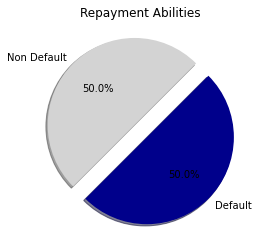

In [64]:
label = ('Non Default', 'Default')
color = ('lightgrey','darkblue')
explode = (0.1, 0.1)

plt.title('Repayment Abilities')
plt.pie(
    df.TARGET.value_counts(),
    labels=label,
    autopct='%1.1f%%',
    colors=color,
    explode=explode,
    shadow=True,
    startangle=45
)
plt.show()

Jumlah Nasabah Berdasarkan Kemampuan Membayarnya

0 = lunas/tidak ada masalah pelunasan, 1 = gagal bayar/memiliki kesulitan dalam pembayaran. Data keduanya balance.

# Bivariate: Categorical Features Vs Target

Contract Type, Gender, Car Ownership Status, and Realty Ownership Status

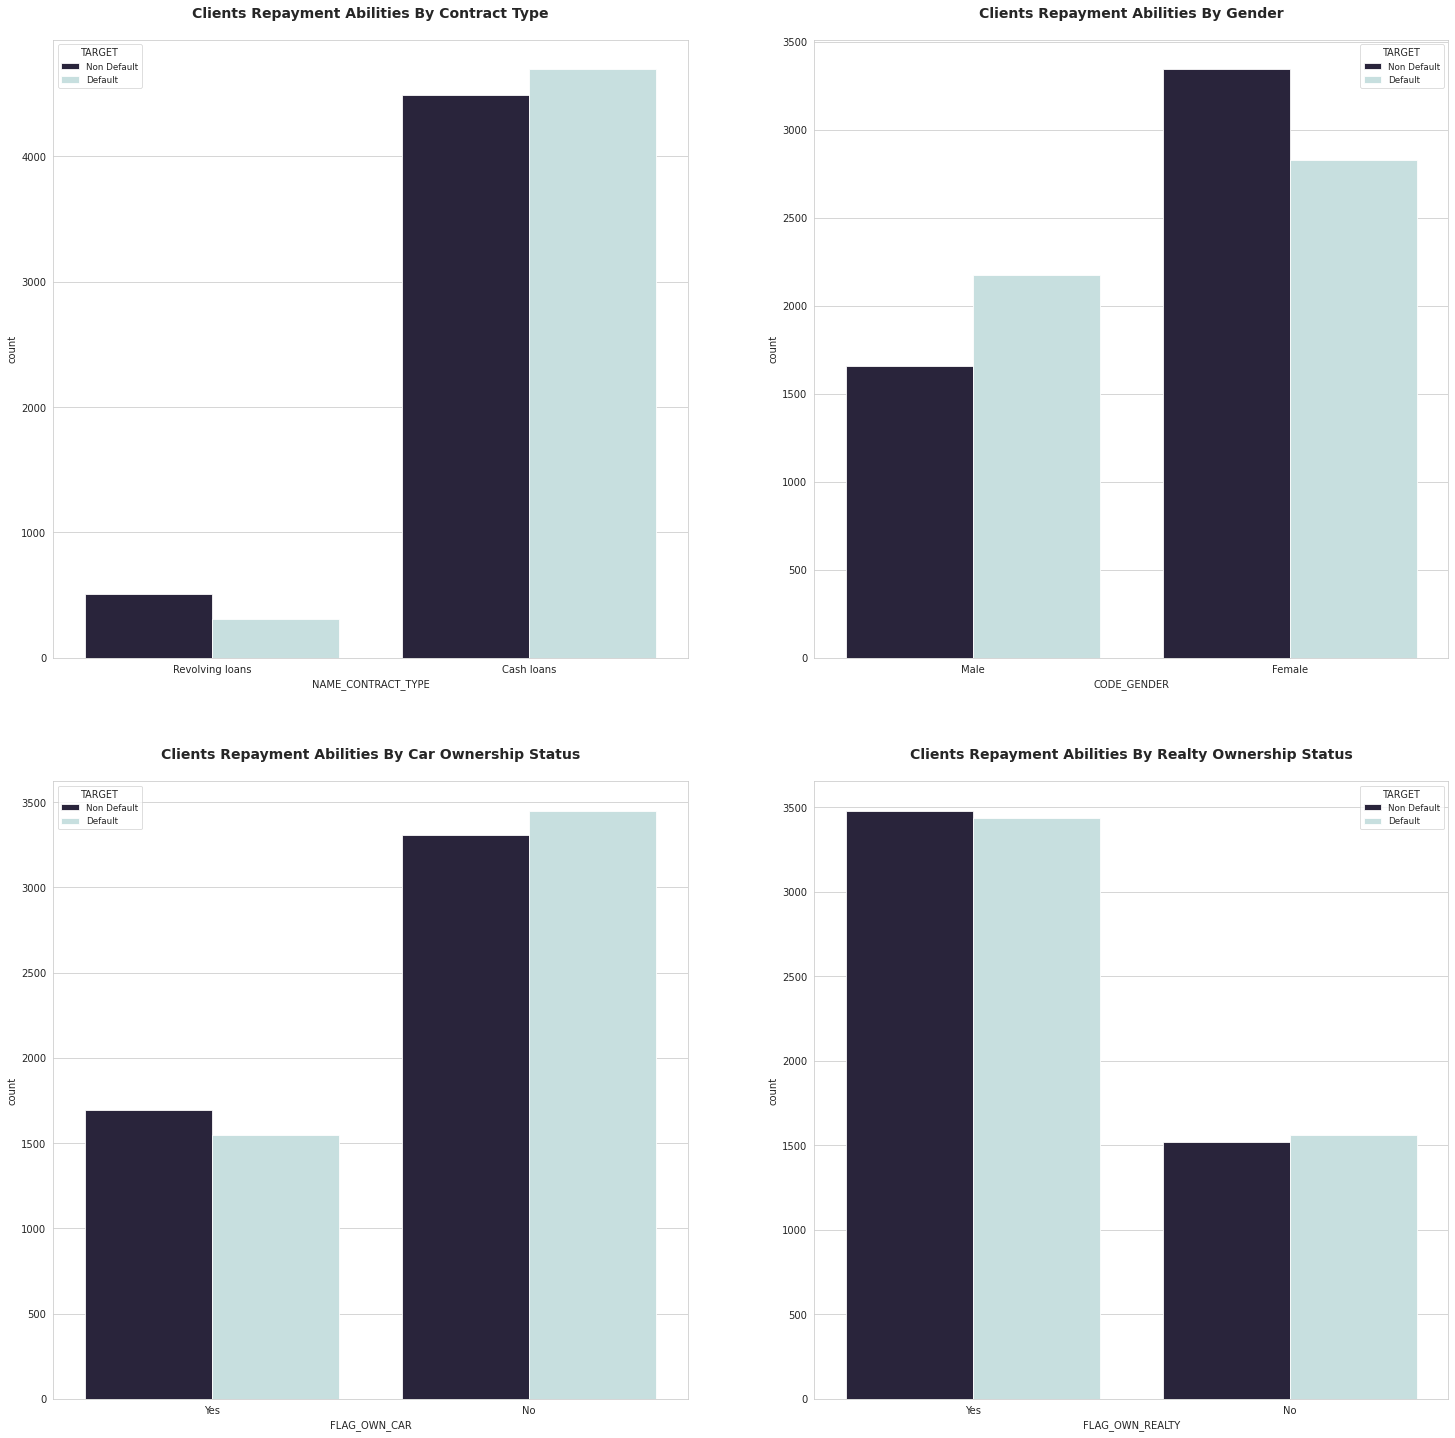

In [73]:
# visualization pt 1
sns.set_style('whitegrid')
fig, ax = plt.subplots(2,2, figsize=(25,25))
sns.set_context('paper', font_scale=1)

ax[0][0].set_title('Clients Repayment Abilities By Contract Type\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_CONTRACT_TYPE', data = df, hue = 'TARGET', palette = 'ch:start=0.2,rot=-.3_r', ax=ax[0][0])

ax[0][1].set_title('Clients Repayment Abilities By Gender\n', fontweight='bold', fontsize=14)
sns.countplot(x='CODE_GENDER', data = df, hue = 'TARGET', palette = 'ch:start=0.2,rot=-.3_r', ax=ax[0][1])

ax[1][0].set_title('\nClients Repayment Abilities By Car Ownership Status\n', fontweight='bold', fontsize=14)
sns.countplot(x='FLAG_OWN_CAR', data = df, hue = 'TARGET', palette = 'ch:start=0.2,rot=-.3_r', ax=ax[1][0])

ax[1][1].set_title('\nClients Repayment Abilities By Realty Ownership Status\n', fontweight='bold', fontsize=14)
sns.countplot(x='FLAG_OWN_REALTY', data = df, hue = 'TARGET', palette = 'ch:start=0.2,rot=-.3_r', ax=ax[1][1])

Gender vs Target

In [60]:
df['CODE_GENDER'] = df['CODE_GENDER'].replace(['F','M'],['Female','Male'])

In [65]:
gt = df.groupby(by=['CODE_GENDER','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Gender')
gt.sort_values(by='SK_ID_CURR', ascending=False)
gt.style.background_gradient(cmap='Blues')

Clients Repayment Abilities By Gender


,CODE_GENDER,TARGET,SK_ID_CURR
0,Female,Default,2827
1,Female,Non Default,3344
2,Male,Default,2173
3,Male,Non Default,1656


In [66]:
data[['CODE_GENDER','TARGET']].groupby(['CODE_GENDER'],as_index=False).mean().sort_values(['TARGET'], ascending=False)

,CODE_GENDER,TARGET
1,M,0.567511
0,F,0.458111


Dapat dilihat bahwa wanita yang kebanyakan mengajukan pinjaman dalam data. 

Namun, persentase yang lebih besar (sekitar 60% dari total) pria mengalami masalah dalam membayar pinjaman dibandingkan dengan nasabah wanita (sekitar 40%).

Car Ownership Status vs Target

In [67]:
df['FLAG_OWN_CAR'] = df['FLAG_OWN_CAR'].replace(['Y','N'],['Yes','No'])

In [68]:
ot = df.groupby(by=['FLAG_OWN_CAR','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Car Ownership Status')
ot.sort_values(by='SK_ID_CURR', ascending=False)
ot.style.background_gradient(cmap='Blues')

Clients Repayment Abilities By Car Ownership Status


,FLAG_OWN_CAR,TARGET,SK_ID_CURR
0,No,Default,3450
1,No,Non Default,3308
2,Yes,Default,1550
3,Yes,Non Default,1692


In [69]:
data[['FLAG_OWN_CAR','TARGET']].groupby(['FLAG_OWN_CAR'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,FLAG_OWN_CAR,TARGET
0,N,0.510506
1,Y,0.478100


Sebagian besar nasabah tidak memiliki mobil. 

Nasabah yang memiliki mobil (sekitar 51%) mengalami kesulitan dalam pengembalian pinjaman dibandingkan dengan nasabah yang tidak memiliki mobil (48%). Namun perbedaannya tidak terlalu signifikan.

In [70]:
df['FLAG_OWN_REALTY'] = df['FLAG_OWN_REALTY'].replace(['Y','N'],['Yes','No'])

Realty Owenership Status vs Target

In [71]:
rt = df.groupby(by=['FLAG_OWN_REALTY','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Realty Ownership Status')
rt.sort_values(by='SK_ID_CURR', ascending=False)
rt.style.background_gradient(cmap='Blues')

Clients Repayment Abilities By Realty Ownership Status


,FLAG_OWN_REALTY,TARGET,SK_ID_CURR
0,No,Default,1562
1,No,Non Default,1521
2,Yes,Default,3438
3,Yes,Non Default,3479


In [72]:
data[['FLAG_OWN_REALTY','TARGET']].groupby(['FLAG_OWN_REALTY'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,FLAG_OWN_REALTY,TARGET
0,N,0.506649
1,Y,0.497036


Sebagian besar nasabah memiliki rumah/apartemen.

Nasabah yang memiliki rumah/flat (sekitar 8%) memiliki masalah dalam membayar pinjaman dibandingkan dengan nasabah yang tidak memiliki rumah/flat (sekitar 7%). Namun, perbedaannya tidak terlalu signifikan.

Suite Type, Income Type, Education Type, and Family Status

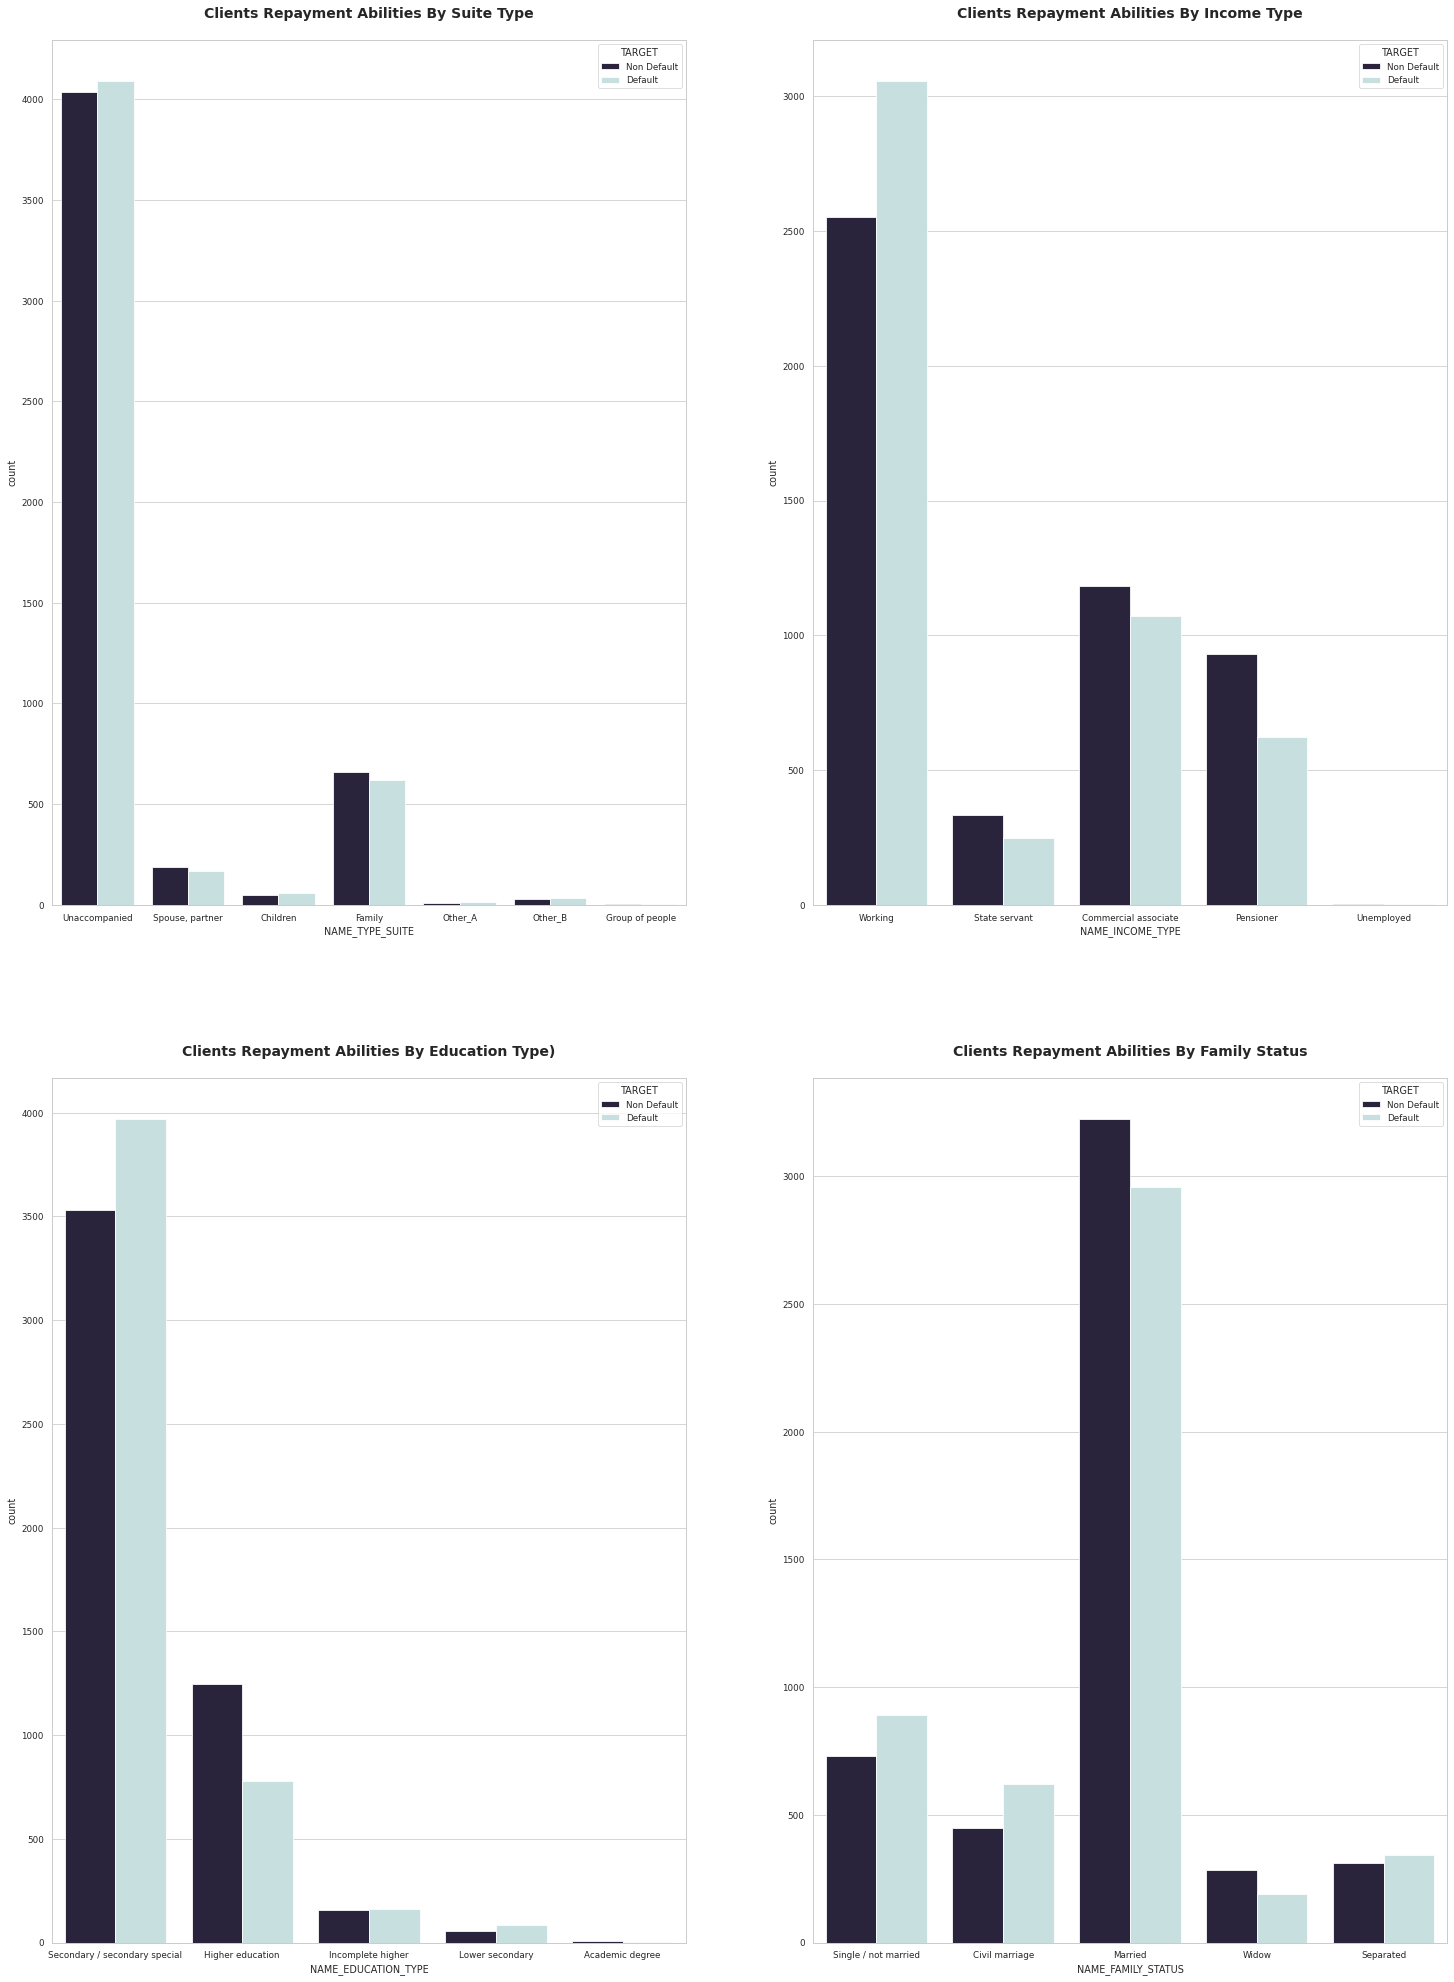

In [74]:
# visualization pt. 2
sns.set_style('whitegrid')
fig, ax = plt.subplots(2,2, figsize=(25,35))
sns.set_context('paper', font_scale=1)

ax[0][0].set_title('Clients Repayment Abilities By Suite Type\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_TYPE_SUITE', data = df, hue = 'TARGET', palette = 'ch:start=0.2,rot=-.3_r', ax=ax[0][0])

ax[0][1].set_title('Clients Repayment Abilities By Income Type\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_INCOME_TYPE', data = df, hue = 'TARGET', palette = 'ch:start=0.2,rot=-.3_r', ax=ax[0][1])

ax[1][0].set_title('\nClients Repayment Abilities By Education Type)\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_EDUCATION_TYPE', data = df, hue = 'TARGET', palette = 'ch:start=0.2,rot=-.3_r', ax=ax[1][0])

ax[1][1].set_title('\nClients Repayment Abilities By Family Status\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_FAMILY_STATUS', data = df, hue = 'TARGET', palette = 'ch:start=0.2,rot=-.3_r', ax=ax[1][1])

Suite Type Vs Target

In [75]:
st = df.groupby(by=['NAME_TYPE_SUITE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Suite Type')
st.sort_values(by='SK_ID_CURR', ascending=False)
st.style.background_gradient(cmap='Blues')

Clients Repayment Abilities By Suite Type


,NAME_TYPE_SUITE,TARGET,SK_ID_CURR
0,Children,Default,59
1,Children,Non Default,48
2,Family,Default,622
3,Family,Non Default,660
4,Group of people,Default,2
5,Group of people,Non Default,6
6,Other_A,Default,15
7,Other_A,Non Default,11
8,Other_B,Default,35
9,Other_B,Non Default,31


In [76]:
data[['NAME_TYPE_SUITE','TARGET']].groupby(['NAME_TYPE_SUITE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_TYPE_SUITE,TARGET
3,Other_A,0.576923
0,Children,0.551402
4,Other_B,0.530303
6,Unaccompanied,0.503323
1,Family,0.485179
5,"Spouse, partner",0.471751
2,Group of people,0.250000


Klien yang ditemani oleh other_b saat mengajukan pinjaman memiliki persentase yang lebih tinggi untuk mengalami kesulitan dalam melunasi pinjaman (sekitar 10%).

In [77]:
rt = df.groupby(by=['NAME_INCOME_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Income Type')
rt.sort_values(by='SK_ID_CURR', ascending=False)
rt.style.background_gradient(cmap='Blues')

Clients Repayment Abilities By Income Type


,NAME_INCOME_TYPE,TARGET,SK_ID_CURR
0,Commercial associate,Default,1070
1,Commercial associate,Non Default,1182
2,Pensioner,Default,623
3,Pensioner,Non Default,930
4,State servant,Default,249
5,State servant,Non Default,333
6,Unemployed,Default,2
7,Unemployed,Non Default,2
8,Working,Default,3056
9,Working,Non Default,2553


In [78]:
data[['NAME_INCOME_TYPE','TARGET']].groupby(['NAME_INCOME_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_INCOME_TYPE,TARGET
4,Working,0.544839
3,Unemployed,0.500000
0,Commercial associate,0.475133
2,State servant,0.427835
1,Pensioner,0.401159


Dapat dilihat bahwa nasabah dengan tipe pendapatan bekerja telah mengajukan mayoritas pinjaman yang lebih besar, yaitu sekitar 158.774 pengajuan pinjaman.

Nasabah dengan tipe pendapatan pengusaha dan pelajar tidak mengalami kesulitan dalam membayar pinjaman mereka.

Sedangkan nasabah dengan jenis pendapatan cuti melahirkan dan tidak bekerja memiliki persentase tertinggi (sekitar 40% dan 36%) TARGET = 1, yaitu mengalami kesulitan dalam melunasi pinjaman.

Translated with www.DeepL.com/Translator (free version)

Education Type Vs Target

In [79]:
et = df.groupby(by=['NAME_EDUCATION_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Education Type')
et.sort_values(by='SK_ID_CURR', ascending=False)
et.style.background_gradient(cmap='Blues')

Clients Repayment Abilities By Education Type


,NAME_EDUCATION_TYPE,TARGET,SK_ID_CURR
0,Academic degree,Default,1
1,Academic degree,Non Default,7
2,Higher education,Default,780
3,Higher education,Non Default,1248
4,Incomplete higher,Default,163
5,Incomplete higher,Non Default,158
6,Lower secondary,Default,86
7,Lower secondary,Non Default,57
8,Secondary / secondary special,Default,3970
9,Secondary / secondary special,Non Default,3530


In [80]:
data[['NAME_EDUCATION_TYPE','TARGET']].groupby(['NAME_EDUCATION_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_EDUCATION_TYPE,TARGET
3,Lower secondary,0.601399
4,Secondary / secondary special,0.529333
2,Incomplete higher,0.507788
1,Higher education,0.384615
0,Academic degree,0.125000


Sejumlah besar aplikasi (218 ribu) diajukan oleh nasabah yang memiliki pendidikan menengah, diikuti oleh nasabah dengan pendidikan tinggi dengan 75 ribu aplikasi.

Sementara itu, dapat dilihat bahwa nasabah dengan jenis pendidikan menengah ke bawah memiliki persentase tertinggi (sekitar 10%) dari TARGET = 1, yaitu mengalami masalah dalam membayar pinjaman.

Family Status Vs Target

In [82]:
ft = df.groupby(by=['NAME_FAMILY_STATUS','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Family Status')
ft.sort_values(by='SK_ID_CURR', ascending=False)
ft.style.background_gradient(cmap='Blues')

Clients Repayment Abilities By Family Status


,NAME_FAMILY_STATUS,TARGET,SK_ID_CURR
0,Civil marriage,Default,619
1,Civil marriage,Non Default,448
2,Married,Default,2957
3,Married,Non Default,3224
4,Separated,Default,341
5,Separated,Non Default,312
6,Single / not married,Default,892
7,Single / not married,Non Default,731
8,Widow,Default,191
9,Widow,Non Default,285


In [83]:
data[['NAME_FAMILY_STATUS','TARGET']].groupby(['NAME_FAMILY_STATUS'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_FAMILY_STATUS,TARGET
0,Civil marriage,0.580131
3,Single / not married,0.549600
2,Separated,0.522205
1,Married,0.478402
4,Widow,0.401261


Terlihat bahwa nasabah yang sudah menikah lebih banyak mengajukan pinjaman, yaitu sekitar 196.432 pengajuan pinjaman.

Nasabah dengan status keluarga kawin dan lajang memiliki persentase tertinggi (sekitar 9%) dari nasabah yang mengalami masalah dalam pengembalian pinjaman.

Housing Type, Occupation Type, Process Day, and Organization Type

Housing Type vs Target

In [84]:
ht = df.groupby(by=['NAME_HOUSING_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Housing Type')
ht.sort_values(by='SK_ID_CURR', ascending=False)
ht.style.background_gradient(cmap='Blues')

Clients Repayment Abilities By Housing Type


,NAME_HOUSING_TYPE,TARGET,SK_ID_CURR
0,Co-op apartment,Default,17
1,Co-op apartment,Non Default,26
2,House / apartment,Default,4316
3,House / apartment,Non Default,4436
4,Municipal apartment,Default,179
5,Municipal apartment,Non Default,191
6,Office apartment,Default,35
7,Office apartment,Non Default,38
8,Rented apartment,Default,114
9,Rented apartment,Non Default,85


In [85]:
data[['NAME_HOUSING_TYPE','TARGET']].groupby(['NAME_HOUSING_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_HOUSING_TYPE,TARGET
5,With parents,0.602131
4,Rented apartment,0.572864
1,House / apartment,0.493144
2,Municipal apartment,0.483784
3,Office apartment,0.479452
0,Co-op apartment,0.395349


Dapat dilihat bahwa nasabah dengan tipe rumah kontrakan memiliki persentase tertinggi (sekitar 12%) dalam hal kesulitan melunasi pinjaman.

Text(0.5, 0, '\nHousing Type')

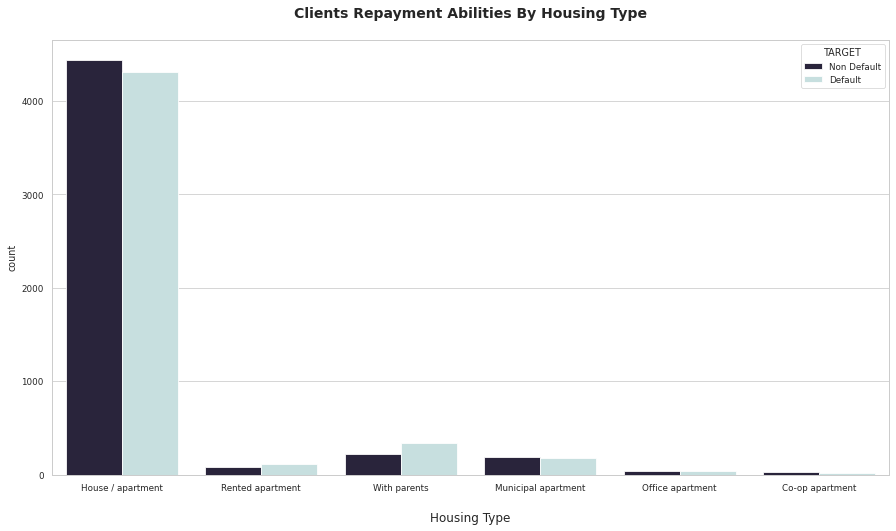

In [87]:
# visualization
plt.figure(figsize=(15,8))
fig = sns.countplot(x='NAME_HOUSING_TYPE', data = df, hue = 'TARGET', palette = 'ch:start=0.2,rot=-.3_r')
plt.title('Clients Repayment Abilities By Housing Type\n', fontweight='bold', fontsize=14)
plt.xlabel('\nHousing Type', fontsize=12)

Klien yang tinggal di rumah/apartemen memiliki jumlah pengajuan pinjaman tertinggi yaitu sebesar 272 ribu.

Occupation Type Vs Target

In [88]:
ot = df.groupby(by=['OCCUPATION_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Occupation Type')
ot.sort_values(by='SK_ID_CURR', ascending=False)
ot.style.background_gradient(cmap='Blues')

Clients Repayment Abilities By Occupation Type


,OCCUPATION_TYPE,TARGET,SK_ID_CURR
0,Accountants,Default,102
1,Accountants,Non Default,175
2,Cleaning staff,Default,85
3,Cleaning staff,Non Default,66
4,Cooking staff,Default,135
5,Cooking staff,Non Default,95
6,Core staff,Default,340
7,Core staff,Non Default,473
8,Drivers,Default,420
9,Drivers,Non Default,304


In [89]:
data[['OCCUPATION_TYPE','TARGET']].groupby(['OCCUPATION_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,OCCUPATION_TYPE,TARGET
9,Low-skill Laborers,0.625000
17,Waiters/barmen staff,0.625000
2,Cooking staff,0.586957
8,Laborers,0.580564
4,Drivers,0.580110
16,Security staff,0.573171
1,Cleaning staff,0.562914
14,Sales staff,0.531223
13,Realty agents,0.481481
12,Private service staff,0.477273


Sejumlah besar aplikasi (55 ribu) diajukan oleh nasabah yang bekerja sebagai Buruh.

Terlihat bahwa nasabah dengan jenis pekerjaan Buruh Berketerampilan Rendah memiliki persentase tertinggi (sekitar 17%) dari TARGET = 1, yaitu mengalami masalah dalam membayar pinjaman.

Process Day Vs Target

In [90]:
pt = df.groupby(by=['WEEKDAY_APPR_PROCESS_START','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Process Day')
pt.sort_values(by='SK_ID_CURR', ascending=False)
pt.style.background_gradient(cmap='Blues')

Clients Repayment Abilities By Process Day


,WEEKDAY_APPR_PROCESS_START,TARGET,SK_ID_CURR
0,FRIDAY,Default,823
1,FRIDAY,Non Default,821
2,MONDAY,Default,821
3,MONDAY,Non Default,813
4,SATURDAY,Default,519
5,SATURDAY,Non Default,568
6,SUNDAY,Default,267
7,SUNDAY,Non Default,275
8,THURSDAY,Default,850
9,THURSDAY,Non Default,823


In [91]:
data[['WEEKDAY_APPR_PROCESS_START','TARGET']].groupby(['WEEKDAY_APPR_PROCESS_START'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,WEEKDAY_APPR_PROCESS_START,TARGET
4,THURSDAY,0.508069
6,WEDNESDAY,0.503597
1,MONDAY,0.502448
5,TUESDAY,0.502283
0,FRIDAY,0.500608
3,SUNDAY,0.492620
2,SATURDAY,0.477461


Text(0.5, 0, '\nProcess Day')

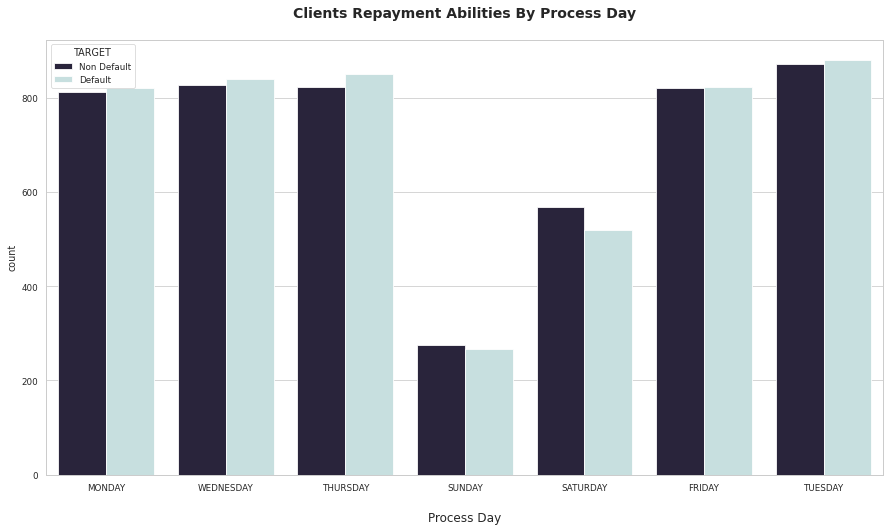

In [92]:
# visualization
plt.figure(figsize=(15,8))
fig = sns.countplot(x='WEEKDAY_APPR_PROCESS_START', data = df, hue = 'TARGET', palette = 'ch:start=0.2,rot=-.3_r')
plt.title('Clients Repayment Abilities By Process Day\n', fontweight='bold', fontsize=14)
plt.xlabel('\nProcess Day', fontsize=12)

Dapat dilihat bahwa setiap hari pemrosesan aplikasi memiliki persentase yang hampir sama (sekitar 7% - 8%) dalam TARGET = 1, yaitu mengalami masalah dalam pengembalian pinjaman.

Organization Type Vs Target

In [93]:
tt = df.groupby(by=['ORGANIZATION_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Suite Type')
tt.sort_values(by='SK_ID_CURR', ascending=False)
tt.style.background_gradient(cmap='Blues')

Clients Repayment Abilities By Suite Type


,ORGANIZATION_TYPE,TARGET,SK_ID_CURR
0,Advertising,Default,9
1,Advertising,Non Default,5
2,Agriculture,Default,60
3,Agriculture,Non Default,37
4,Bank,Default,30
5,Bank,Non Default,40
6,Business Entity Type 1,Default,107
7,Business Entity Type 1,Non Default,81
8,Business Entity Type 2,Default,165
9,Business Entity Type 2,Non Default,165


In [95]:
data[['ORGANIZATION_TYPE','TARGET']].groupby(['ORGANIZATION_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,ORGANIZATION_TYPE,TARGET
21,Industry: type 4,0.741935
45,Trade: type 1,0.666667
40,Security,0.660550
38,Restaurant,0.646154
36,Realtor,0.642857
0,Advertising,0.642857
19,Industry: type 2,0.631579
18,Industry: type 13,0.625000
1,Agriculture,0.618557
14,Industry: type 1,0.605263


Terlihat bahwa nasabah dengan tipe organisasi: tipe 3 memiliki persentase tertinggi (sekitar 15%) dengan TARGET = 1, yaitu mengalami masalah dalam pengembalian pinjaman.

# Bivariate: Numerical Features Vs Target

Amount Credit of the Loan Vs Target

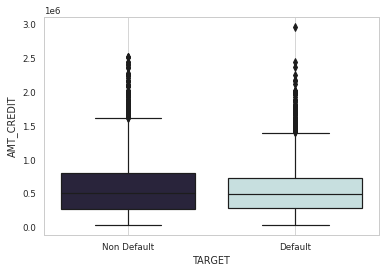

In [97]:
sns.boxplot(x='TARGET', y='AMT_CREDIT', data=df, palette = 'ch:start=0.2,rot=-.3_r')
plt.grid()
plt.show()

Dapat dilihat bahwa nilai median dari jumlah kredit nasabah yang tidak mengalami kesulitan pembayaran sedikit lebih besar dari nilai median nasabah yang mengalami kesulitan pembayaran. Artinya, nasabah dengan jumlah kredit yang lebih tinggi memiliki peluang sedikit lebih tinggi untuk dapat melunasi pinjaman dibandingkan nasabah dengan jumlah kredit yang lebih rendah.

Amount Income Vs Target

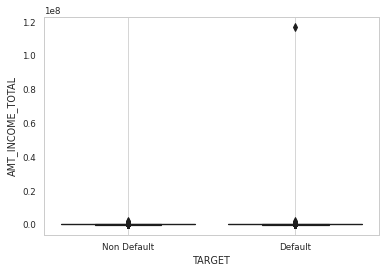

In [98]:
sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=df, palette = 'ch:start=0.2,rot=-.3_r')
plt.grid()
plt.show()

Dapat dilihat bahwa baik nasabah yang mengalami kesulitan pembayaran maupun nasabah yang tidak mengalami kesulitan pembayaran, sebagian besar memiliki nilai yang sama. Namun, seiring dengan meningkatnya pendapatan nasabah, probabilitas nasabah yang tidak mengalami kesulitan dalam membayar pinjaman juga meningkat.

Age Vs target

In [99]:
no_age = data[data['TARGET']==0]['DAYS_BIRTH'].values/-365
yes_age = data[data['TARGET']==1]['DAYS_BIRTH'].values/-365

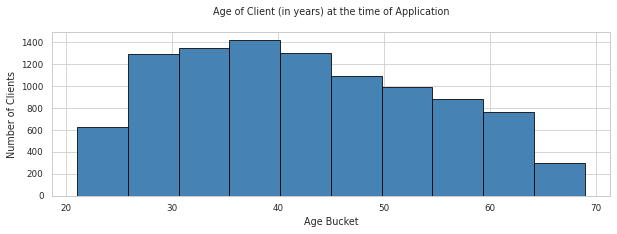

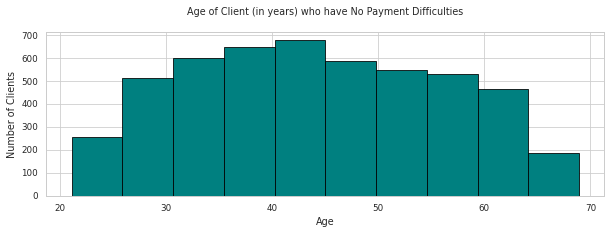

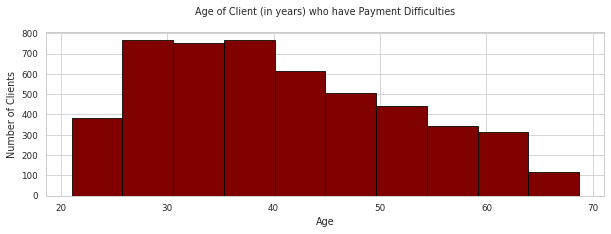

In [100]:
plt.figure(figsize=(10,3))
plt.hist(data['DAYS_BIRTH'].values/-365, bins=10, edgecolor='black', color='steelblue')
plt.title('Age of Client (in years) at the time of Application\n')
plt.xlabel('Age Bucket')
plt.ylabel('Number of Clients')
plt.show()

plt.figure(figsize=(10,3))
plt.hist(no_age, bins=10, edgecolor='black', color='teal')
plt.title('Age of Client (in years) who have No Payment Difficulties\n')
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.show()

plt.figure(figsize=(10,3))
plt.hist(yes_age, bins=10, edgecolor='black', color='maroon')
plt.title('Age of Client (in years) who have Payment Difficulties\n')
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.show()

Sebagian besar nasabah yang mengajukan pinjaman berusia antara 35-40 tahun, diikuti oleh nasabah berusia antara 40-45 tahun. Sementara itu, jumlah pemohon untuk nasabah yang berusia <25 tahun atau usia >65 tahun sangat rendah.

Klien yang tidak mengalami kesulitan pembayaran adalah klien dengan rentang usia 35-45 tahun. Sedangkan klien yang mengalami kesulitan pembayaran adalah klien dengan rentang usia 25-35 tahun.

**Multivariat Visualization**

Grouped by Realty Ownership Status

1. Car Ownership Status, The Number of Children, Target, and House/Flat Ownership Status

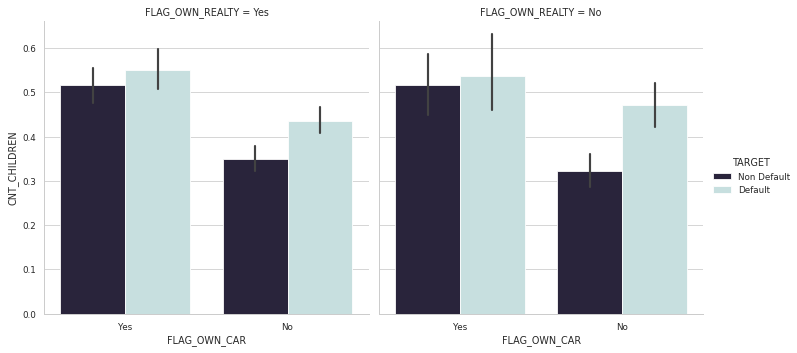

In [101]:
sns.catplot(x = 'FLAG_OWN_CAR',
            y = 'CNT_CHILDREN', 
            hue = 'TARGET', 
            col = 'FLAG_OWN_REALTY', 
            kind = 'bar', palette = 'ch:start=0.2,rot=-.3_r',
            data = df)
plt.show()

Nasabah yang memiliki mobil dan rumah/apartemen memiliki masalah dalam membayar pinjaman karena jumlah anak yang lebih banyak dibandingkan dengan nasabah yang tidak memiliki rumah/apartemen.

2. Income Type, Amount of Goods Price, Target, and House/Flat Ownership Status

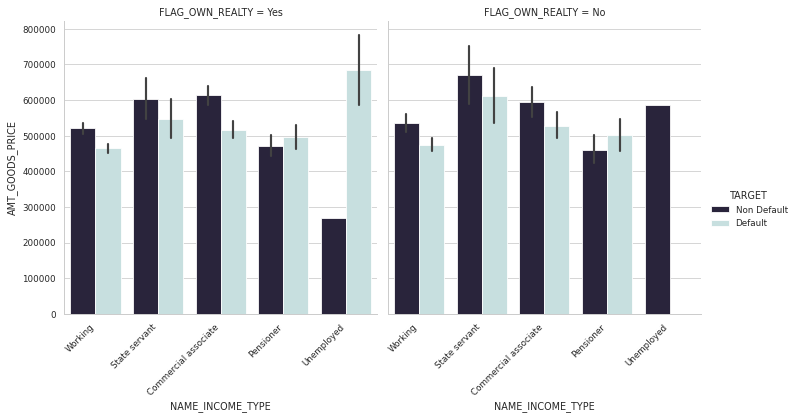

In [102]:
fig = sns.catplot(x = 'NAME_INCOME_TYPE',
            y = 'AMT_GOODS_PRICE', 
            hue = 'TARGET', 
            col = 'FLAG_OWN_REALTY', 
            kind = 'bar', palette = 'ch:start=0.2,rot=-.3_r',
            data = df)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

Nasabah dengan jenis pendapatan cuti melahirkan pada FLAG_OWN_REALTY = Ya (yaitu memiliki rumah/apartemen) memiliki masalah dalam melunasi pinjaman dibandingkan dengan nasabah dengan jenis pendapatan FLAG_OWN_REALTY = Tidak (yaitu tidak memiliki rumah/apartemen).

3. Family Status, Amount of Income, Target, and House/Flat Ownership Status

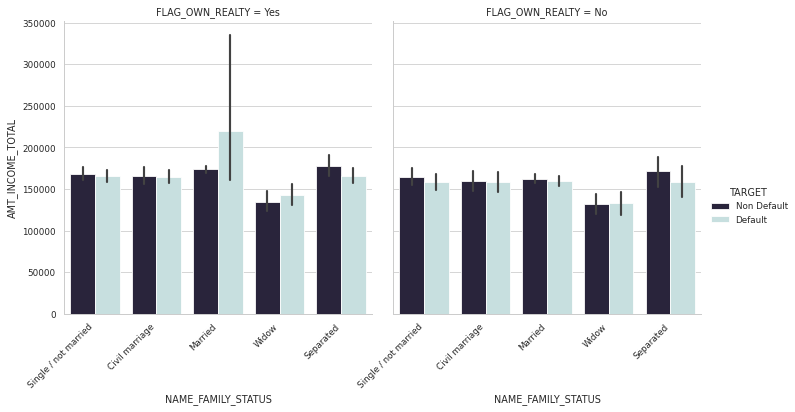

In [103]:
fig = sns.catplot(x = 'NAME_FAMILY_STATUS',
            y = 'AMT_INCOME_TOTAL', 
            hue = 'TARGET', 
            col = 'FLAG_OWN_REALTY', 
            kind = 'bar', palette = 'ch:start=0.2,rot=-.3_r',
            data = df)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

Klien yang sudah menikah dan memiliki rumah/flat (FLAG_OWN_REALTY = Ya) memiliki masalah dalam membayar kembali pinjaman dengan pendapatan menengah dibandingkan dengan saat klien tidak memiliki rumah/flat (FLAG_OWN_REALTY = Tidak).

**Grouped by Rating of Region where Client Lives**

1. Housing Type, Amount Credit of Loan, Target, and Rating of Region where Client Lives

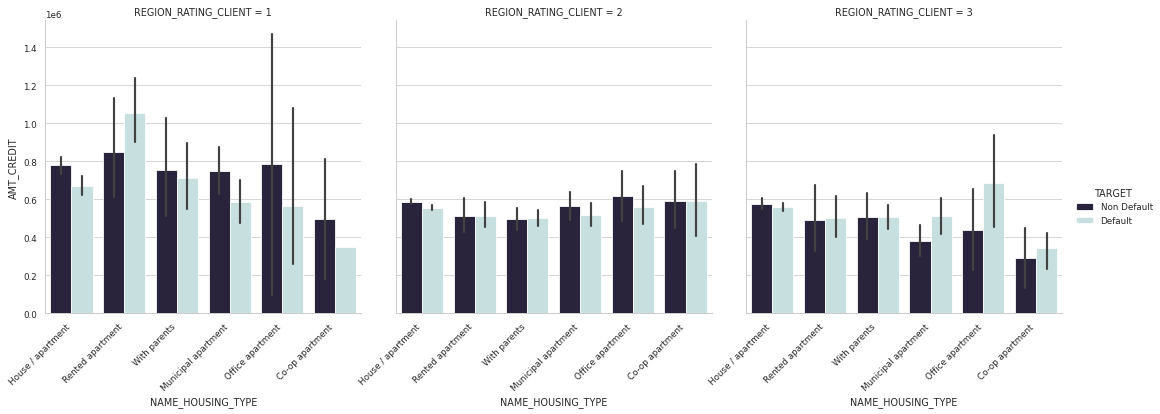

In [104]:
fig = sns.catplot(x = 'NAME_HOUSING_TYPE',
            y = 'AMT_CREDIT', 
            hue = 'TARGET', 
            col = 'REGION_RATING_CLIENT', 
            kind = 'bar', palette = 'ch:start=0.2,rot=-.3_r',
            data = df)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

Nasabah yang tinggal di apartemen sewaan dan apartemen perkantoran dan wilayah mereka memiliki peringkat 1, memiliki masalah dalam membayar pinjaman dibandingkan dengan nasabah di wilayah dengan peringkat 2 untuk jumlah kredit menengah.

2. Education Type, Amount Credit of Loan, Target, and Rating of Region where Client Lives

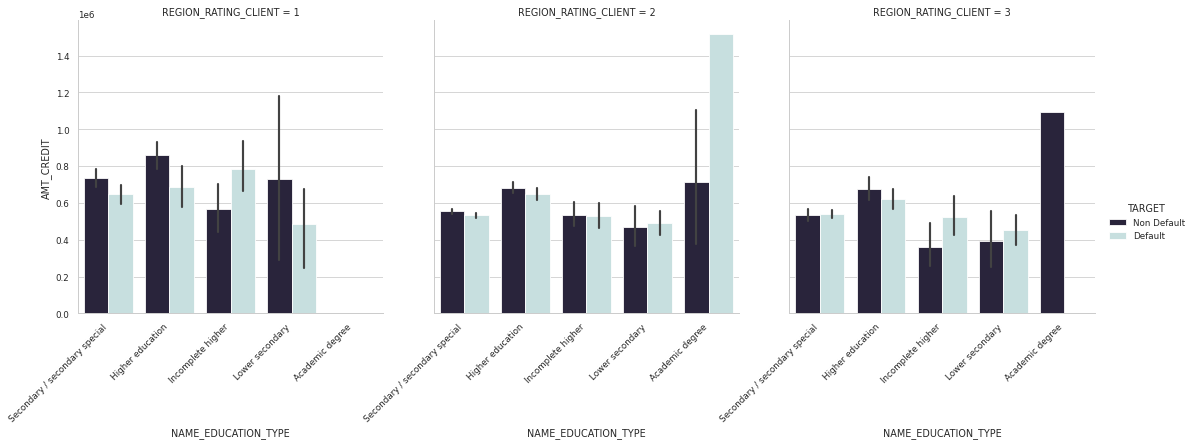

In [105]:
fig = sns.catplot(x = 'NAME_EDUCATION_TYPE',
            y = 'AMT_CREDIT', 
            hue = 'TARGET', 
            col = 'REGION_RATING_CLIENT', 
            kind = 'bar', palette = 'ch:start=0.2,rot=-.3_r',
            data = df)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

Untuk nasabah yang memiliki gelar akademis dan tinggal di wilayah dengan peringkat 2, memiliki masalah dalam membayar pinjaman untuk jumlah kredit yang lebih tinggi. Dan, nasabah dengan gelar yang sama tetapi tinggal di wilayah dengan peringkat 3 memiliki masalah dalam membayar pinjaman untuk jumlah kredit pinjaman menengah.

3. Family Status, Amount Credit of Loan, Target, and Rating of Region where Client Lives

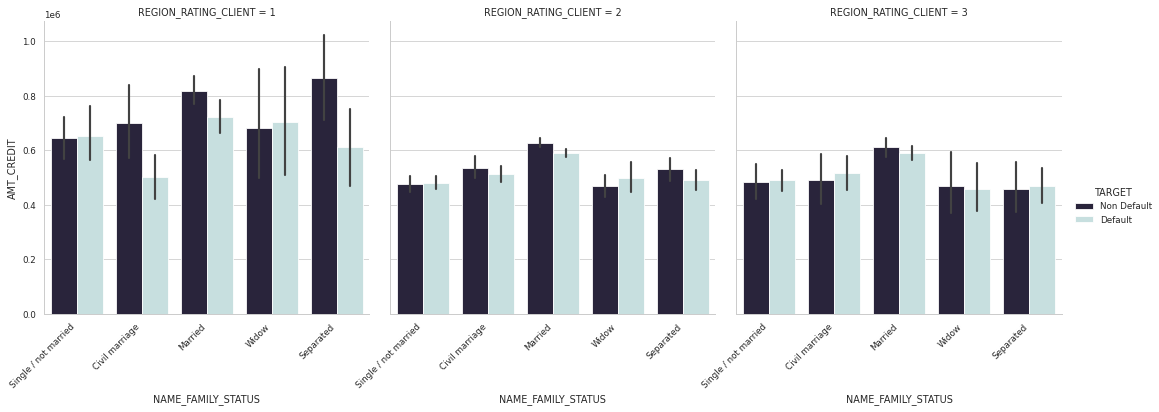

In [106]:
fig = sns.catplot(x = 'NAME_FAMILY_STATUS',
            y = 'AMT_CREDIT', 
            hue = 'TARGET', 
            col = 'REGION_RATING_CLIENT', 
            kind = 'bar', palette = 'ch:start=0.2,rot=-.3_r',
            data = df)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

Nasabah yang memiliki status keluarga sebagai janda, baik yang tinggal di daerah dengan peringkat 1, 2, atau 3, memiliki masalah dalam membayar pinjaman untuk kredit dengan jumlah sedang hingga tinggi.

Nasabah yang memiliki status keluarga sebagai janda/duda, dan tinggal di daerah dengan peringkat 3, memiliki masalah dalam membayar pinjaman untuk jumlah kredit yang sedang dibandingkan dengan nasabah yang tinggal di daerah dengan peringkat 1 atau 2.

# Data Cleaning

In [ ]:
#mengecek apakah dataset memiliki data duplikat
df[df.duplicated()]

In [ ]:
count = df.isnull().sum().sort_values(ascending=False)
percentage = ((df.isnull().sum()/len(df)*100)).sort_values(ascending=False)
missing_df = pd.concat([count, percentage], axis=1, keys=['Count','Percentage'])
print('Count and percentage of missing values for top 20 columns:')
missing_df.head(20)

Count and percentage of missing values for top 20 columns:


,Count,Percentage
COMMONAREA_MEDI,7170,71.70
COMMONAREA_AVG,7170,71.70
COMMONAREA_MODE,7170,71.70
NONLIVINGAPARTMENTS_MODE,7138,71.38
NONLIVINGAPARTMENTS_AVG,7138,71.38
NONLIVINGAPARTMENTS_MEDI,7138,71.38
LIVINGAPARTMENTS_MODE,7040,70.40
LIVINGAPARTMENTS_AVG,7040,70.40
LIVINGAPARTMENTS_MEDI,7040,70.40
FONDKAPREMONT_MODE,7028,70.28


In [ ]:
percentage = list(percentage[percentage.values>0.3].index)
df.drop(labels=percentage,axis=1,inplace=True)
print(len(percentage))

58


In [ ]:
df.shape

(10000, 64)

In [ ]:
# Cleaning the missing data
df.isnull().sum()

SK_ID_CURR            0
TARGET                0
NAME_CONTRACT_TYPE    0
CODE_GENDER           0
FLAG_OWN_CAR          0
                     ..
FLAG_DOCUMENT_17      0
FLAG_DOCUMENT_18      0
FLAG_DOCUMENT_19      0
FLAG_DOCUMENT_20      0
FLAG_DOCUMENT_21      0
Length: 64, dtype: int64

**Handle Missing Value**

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(9941, 64)

In [ ]:
# Creating Age Column
df['AGE'] = (df['DAYS_REGISTRATION']-df['DAYS_BIRTH'])/365
df['CREDIT_TERM'] = (df['AMT_CREDIT'] / df['AMT_ANNUITY'])

Jumlah Nasabah Berdasarkan Kemampuan Membayarnya

0 = lunas/tidak ada masalah pelunasan,1 = gagal bayar/memiliki kesulitan dala pembayaran 

Distribusi data yang berhasil membayar pinjaman sebelumnya dan gagal bayar itu balance.

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot('CODE_GENDER',hue='TARGET',data=df)
plt.xlabel('Gender : repaid vs default')
plt.legend(frameon=True, loc=1, title='TARGET')
plt.show()

Pria 

In [ ]:
df.hist(figsize=(50,25),color='skyblue')

**Correlation**

In [ ]:
df.corr()['TARGET'].sort_values(ascending=False)

In [ ]:
#checking number of unique values
df.nunique()

In [ ]:
# dropping columns which are not necessary for prediction

to_drop = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','WEEKDAY_APPR_PROCESS_START',
           'HOUR_APPR_PROCESS_START','ORGANIZATION_TYPE','FLAG_MOBIL','DAYS_LAST_PHONE_CHANGE']

df.drop(to_drop, inplace = True, axis = 1)

In [ ]:
for col in df.select_dtypes(include='object').columns.tolist():
    print(df[col].value_counts(normalize=True)*100)
    print('\n')

In [ ]:
X = df.drop('TARGET', axis = 1)
y = df['TARGET']

**Encoding Categorical Columns**

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
X['NAME_INCOME_TYPE'] = label_encoder.fit_transform(X['NAME_INCOME_TYPE'])
X['NAME_FAMILY_STATUS'] = label_encoder.fit_transform(X['NAME_FAMILY_STATUS'])
X['NAME_HOUSING_TYPE'] = label_encoder.fit_transform(X['NAME_HOUSING_TYPE'])
X['NAME_EDUCATION_TYPE'] = label_encoder.fit_transform(X['NAME_EDUCATION_TYPE'])

In [ ]:
encoding = {"NAME_CONTRACT_TYPE": {"Cash loans": 0, "Revolving loans": 1}, "CODE_GENDER": {"F": 0, "M": 1}, "FLAG_OWN_CAR": {"N": 0, "Y": 1},
            "FLAG_OWN_REALTY": {"N": 0, "Y": 1}}
X.replace(encoding, inplace=True)

In [ ]:
pd.set_option('display.max_columns', None)
X.head()

Outlier Detection

In [ ]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

Handling Outliers

In [ ]:
def treat_outlier(x):
    q5 = np.percentile(x,5)
    q25= np.percentile(x,25)
    q75= np.percentile(x,75)
    up_trend=np.percentile(x,95)
    IQR = q75-q25
    low_level = q25-(1.5*IQR)
    up_level = q75+(1.5*IQR)
    
    return x.apply(lambda y: up_trend if y> up_level else y).apply(lambda y: q5 if y < low_level else y)

outlier_list = ['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','CNT_FAM_MEMBERS',
               'REGION_POPULATION_RELATIVE','AMT_GOODS_PRICE','NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE']


for i in X[outlier_list]:
    X[i]=treat_outlier(X[i])

In [ ]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

In [ ]:
# splitting data into training set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Normalisasi Data

In [ ]:
# Scaling the numeric values in the dataset

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build Train, and Predict

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_scaled, y_train)

In [ ]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = rfc.predict(X_test_scaled)
rfc_train_acc = accuracy_score(y_train, rfc.predict(X_train_scaled))
rfc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Random Forest Classifier is : {rfc_train_acc}")
print(f"Test accuracy of Random Forest Classifier is : {rfc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Feature Importance

In [ ]:
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = rfc.feature_importances_
features.sort_values(by=['importance'], ascending=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh', figsize=(25, 25))

Hyperparameter Tuning = untuk mencari tahu parameter mana yang menghasilkan model paling optimal.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf1 = RandomForestClassifier(random_state=42)

param1 = {}
param1['classifier__n_estimators'] = [10, 50, 100, 250]
param1['classifier__max_depth'] = [5, 10, 20]
param1['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param1['classifier'] = [clf1]

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


pipeline = Pipeline([('classifier', clf1)])
params = [param1]
gs_rfc = GridSearchCV(pipeline, params, cv=3, n_jobs=-1, scoring='accuracy').fit(X_train_scaled, y_train)
gs_rfc.best_params_

In [ ]:
# Test data performance
from sklearn.metrics import *

print("Test Accuracy Score:",accuracy_score(gs_rfc.predict(X_test_scaled), y_test))
print("Test Precision:",precision_score(gs_rfc.predict(X_test_scaled), y_test))
print("Test Recall:",recall_score(gs_rfc.predict(X_test_scaled), y_test))

In [ ]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = gs_rfc.predict(X_test_scaled)
rfc_train_acc = accuracy_score(y_train, gs_rfc.predict(X_train_scaled))
rfc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Random Forest Classifier is : {rfc_train_acc}")
print(f"Test accuracy of Random Forest Classifier is : {rfc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))